In [12]:
import cv2 as cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [13]:
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
path = "/content/drive/My Drive/Clara del Rey/BIG DATA/Programacion/FTP/000 Datos/imagenes/"

# ruta en local
os.chdir(path)
imagen = cv2.imread("maksssksksss121.png")

In [15]:
def mostrar(imagen):

    # cambiar a RGB
    if(len(imagen.shape)==3):
        imagen = imagen[...,::-1]

    plt.imshow(imagen)
    plt.show()

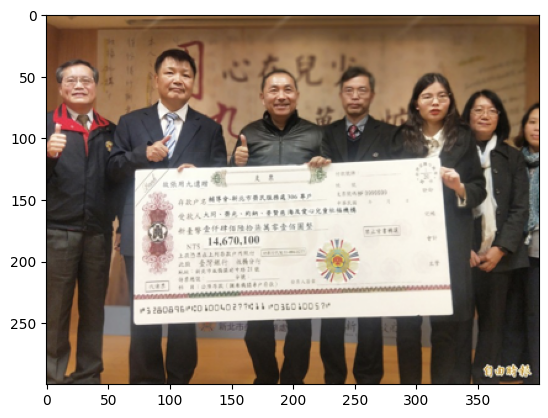

In [16]:
mostrar(imagen)

In [17]:
# cargar el detector de caras
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
gris = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)

# busca las caras y devuelve un array
faces = face_cascade.detectMultiScale(gris, 1.2, 2)
faces

# cada elemento del array es un rectángulo en formato xmin, ymin, ancho, alto

array([[ 11,  41,  31,  31],
       [236,  51,  29,  29],
       [301,  55,  30,  30],
       [342,  67,  28,  28],
       [173,  48,  34,  34],
       [ 89,  35,  35,  35]], dtype=int32)

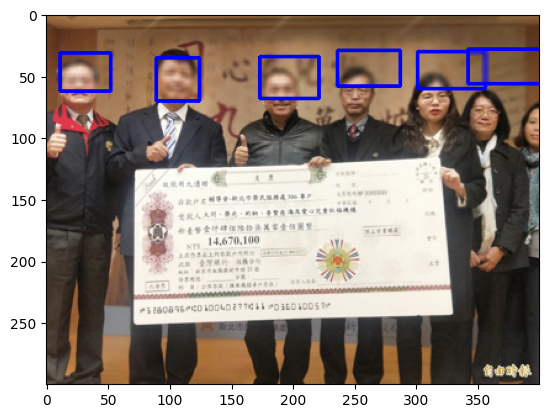

In [18]:
for face in faces:
    xini = face[0]
    xfin = xini +  face[1]
    yini = face[2]
    yfin = face[2] + face[3]

    # difuminar la parte central
    dif = cv2.blur( imagen[yini:yfin ,xini:xfin, :], (5, 5))

    # poner el trozo sobre la imagen original
    imagen[yini:yfin, xini:xfin, :] = dif

    # ponemos un rectanogulo para ver mejor
    imagen = cv2.rectangle(imagen,(xini,yini),(xfin,yfin), (255,0,0),2)

mostrar(imagen)